In [27]:
import numpy as np
import pandas as pd
import os
import re
import warnings

In [28]:
train=pd.read_csv('CarPricesPrediction.csv')
train

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90


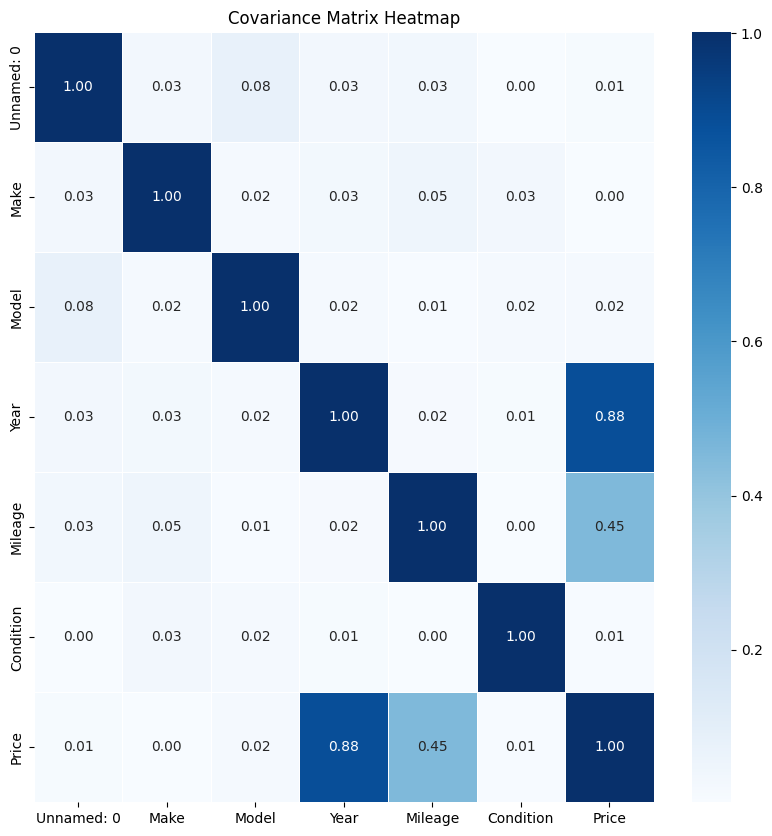

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
df = train.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()


In [31]:
df=df.drop(['Unnamed: 0', 'Make'], axis=1)
X=df.drop(['Price'], axis=1)
Y=df['Price']
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
model=RandomForestRegressor()

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X, Y, cv=kf, scoring='r2')
print("R^2 scores for each fold:", cv_results)
average_r2 = cv_results.mean()
print("Average R^2 across all folds:", average_r2)

R^2 scores for each fold: [0.99941189 0.999559   0.9994407  0.99902686 0.99937199]
Average R^2 across all folds: 0.99936208850912
